<h1> <center> Natural Language Processing in Risk and Finance </h1>
<h3> <center> Developing an Insurance Claim Clustering Application</h3>
<center> <small>by <a href="https://juliandoerr.com">Julian Dörr</a></small>
<br>
<br>

_________________________
_________________________

## <a id='toc1_'></a>About this Course

Course outline

<a id='toc0_'></a>    
- 1. [About this Course](#toc1_)    
  - 1.1. [What you will learn](#toc1_1_)    
- 2. [What is Natural Language Processing?](#toc2_)    
- 3. [Application of Natural Language Processing in Risk Management](#toc3_)    
  - 3.1. [A real-world use case: Automated Claims Processing](#toc3_1_)    
- 4. [Developing an Automated Claims Processing Model](#toc4_)    
  - 4.1. [Data inspection](#toc4_1_)    
  - 4.2. [Tokenization](#toc4_2_)    
  - 4.3. [Stopwords](#toc4_3_)    
  - 4.4. [Vocabulary](#toc4_4_)    
  - 4.5. [Text vectorization](#toc4_5_)    
    - 4.5.1. [Word count vectorizer](#toc4_5_1_)    
    - 4.5.2. [Weighted word count vectorizer](#toc4_5_2_)    
    - 4.5.3. [Static word embeddings](#toc4_5_3_)    
    - 4.5.4. [Contextualized embeddings](#toc4_5_4_)    
  - 4.6. [Topic modeling](#toc4_6_)    
    - 4.6.1. [*Bonus*: Using Generative AI to improve topic names](#toc4_6_1_)    
  - 4.7. [Deployment](#toc4_7_)    
    - 4.7.1. [FastAPI for deployment](#toc4_7_1_)    
    - 4.7.2. [Streamlit for deployment](#toc4_7_2_)     

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

You will find all course material and setup instructions in the following [repository](https://github.com/julienOlivier3/risk-analytics/tree/main/2_nlp).

### <a id='toc1_1_'></a>What you will learn

- **Fundamental Concepts**: Overview of NLP and its relationship with Artificial Intelligence (AI) and Deep Learning (DL).

- **Applied NLP**: Discover how to effectively process insurance claims using advanced NLP techniques.

- **Text Data Processing**: Master the techniques to transform raw text data into a machine-readable format, including:
    - Tokenization: Breaking text into individual words or phrases.
    - Vocabulary Creation: Building a set of unique words from the text.
    - Vectorization: Converting text into numerical representations for analysis.

- **Linguistic representation**: Explore how recent advancements in NLP enable the capture of various levels of linguistic complexity, enhancing understanding and analysis.

- **Topic Modeling**: Learn to cluster text data into meaningful groups, facilitating insights and organization of information.

- **Foundations of Generative AI**: This course lays the groundwork for understanding Generative AI applications that produce human-like language.

## <a id='toc2_'></a>What is Natural Language Processing?

Natural Language Processing (NLP) is a **specialized branch of AI** where methods from the field of Machine Learning and Deep Learning are applied to **bridge the gap between human communication and machine understanding**. 

<img src="img/ai_ml_dl_nlp.png" alt="AI, ML, DL & NLP" style="width: 55vw; min-width: 350px;">
<p><small>Image source: Author</small></p>

<font color="#58e4d4"><b>Artificial Intelligence (AI)</b></font>: **The Broad Umbrella**

AI is the overarching field that encompasses all technologies and systems designed to **simulate human intelligence**. This includes tasks like reasoning, problem-solving, learning, and decision-making.

<font color="#20b49c"><b>Machine Learning (ML)</b></font>: **The Foundation**

Machine learning is a subset of AI that enables systems to **learn from data** and improve their performance over time without being explicitly programmed. ML algorithms identify patterns in structured data and use these patterns to **make predictions or decisions**.

<font color="#086c5c"><b>Deep Learning (DL)</b></font>: **The Engine Behind State-of-the-Art NLP Techniques**

Deep learning is a specialized branch of ML that uses **artificial neural networks** inspired by the human brain. These networks are particularly effective at processing large amounts of **unstructured data**, such as images, text, and audio.

<font color="#08544c"><b>Natural Language Processing (NLP)</b></font>: **A Key Application Area**

Natural language processing is a **specialized branch of AI** that focuses on **enabling machines to understand, interpret, and generate human language**. It bridges the gap between human communication and machine understanding.

NLP draws on concepts from linguistics, computer science, and AI to process and analyze natural language data. It is often **powered by ML and DL techniques**, which help machines learn from vast amounts of text data and improve their language understanding capabilities.

> **Natural Language Processing** is an applied field of artificial intelligence focused on **enabling machines to understand, interpret, and generate human language** in a meaningful way.

## <a id='toc3_'></a>Application of Natural Language Processing in Risk Management

NLP in risk management enhances the ability to **analyze** unstructured data, such as **news articles, social media, and customer feedback, to identify potential risks, emerging trends, and fraudulent activities**. By leveraging techniques like sentiment analysis, text clustering, and text summarization, NLP can **automate the extraction of relevant information**, improve accuracy, and **enable faster response times**. 

### <a id='toc3_1_'></a>A real-world use case: Automated Claims Processing

In the following, we will work on a real-world use case that **insurance companies** typically face. It is the process of **reviewing insurance claims submitted by policyholders** to the insurance company.

Instead of dealing with claims manually, **NLP algorithms are used to extract relevant information** from unstructured data sources: claim forms, emails, and documents. Once done, they **automatically categorise and prioritise claims** based on their severity and complexity, ensuring that urgent or complex claims receive prompt attention while routine claims are processed efficiently.

> An **insurance claim** is a formal request made by a policyholder to an insurance company for coverage for losses or damages incurred that are covered under the insurance policy.

Claims processing is a multi-step process which bears great potential for automation using NLP techniques.

<img src="img/claims_processing.png" alt="Claims processing" width="1000" height="300"/>
<p><small>Image source: <a href="https://www.astera.com/de/type/blog/automated-claims-processing/">Astera</a></small></p>

## <a id='toc4_'></a>Developing an Automated Claims Processing Model

### <a id='toc4_1_'></a>Data inspection

In [122]:
import pandas as pd

Read data.

In [123]:
df_claims = pd.read_csv('data/claims.csv')

In [124]:
df_claims.head(3)

,claim_description
0,THE IV WAS MAKING A LEFT TURN ON A GREEN ARROW...
1,CLAIMANT ALLEGES SHE SUFFERED INJURIES IN AN E...
2,"IV PASSENGER SUSTAINED INJURIES, OV AND IV COL..."


Remove null values.

In [125]:
df_claims.claim_description.isnull().sum()

227

In [126]:
df_claims = df_claims[df_claims.claim_description.notnull()]

In [127]:
df_claims.shape[0]

191363

We have data comprising 191,363 claim descriptions.

Lowercase all.

In [128]:
df_claims['claim_description'] = df_claims.claim_description.apply(lambda text: text.lower())

In [129]:
df_claims.sample(3).style

,claim_description
41128,ov merged into rear tandems of iv
127460,vehicle damage caused by a property access gate
70113,"customer hit power transformer near chevron station causing power outage for approximately 20 hours, pge required us to hire electrician to come check power panel, found panel d not to have power."


Looking at the distribution of the number of words in the claims descriptions, we can see on average the claims have around 30 words with some outliers that are relatively long with more than 300 words. 

<Axes: ylabel='Frequency'>

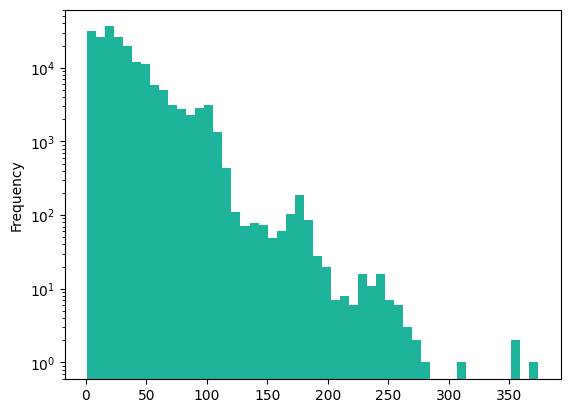

In [130]:
df_claims.claim_description.apply(lambda x: len(x.split(' '))).plot.hist(bins=50, color='#1eb49c', log=True)

### <a id='toc4_2_'></a>Tokenization

**Tokenization** in NLP is the process of **dividing text into smaller units called tokens**, which can be **words, phrases, or symbols**, and it is essential for enabling machines to analyze and understand unstructured text data effectively.

In the following section, we will utilize the `re` module to implement our custom tokenization logic. Regular expressions (regex) are a powerful tool for string manipulation and can effectively extract tokens from text.

> **Regular expressions** (regex) are sequences of characters that define search patterns, allowing users to efficiently find, match, or manipulate strings of text based on specific criteria.

In [131]:
import re

tokenize_pattern = re.compile(r"(?u)\b\w\w+\b")

- \w: **word character** like letters (both lowercase and uppercase), digits or underscores. \w\w+ means that at least 2 word characters need to follow one another.
- \b: **word boundary** position where a word character is not followed or preceded by another word character.

In [132]:
claim = 'Broken rear window while parked. Window splinter caused damage to other vehicle.'

In [133]:
tokens = tokenize_pattern.findall(claim.lower())

In [134]:
tokens

['broken',
 'rear',
 'window',
 'while',
 'parked',
 'window',
 'splinter',
 'caused',
 'damage',
 'to',
 'other',
 'vehicle']

### <a id='toc4_3_'></a>Stopwords

**Stopwords are common words in a language**, such as "the," "is," and "and," that **carry little semantic value** and are often removed in NLP tasks to enhance the efficiency and accuracy of text analysis by focusing on more meaningful content.

There are pre-defined lists of stopwords for different languages. We use the English stopword list from the `nltk` library.

In [135]:
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords', quiet=True)

True

Using list comprehension we can now create our stopword list with lowercased words only.

In [136]:
stopwords_en = [stopword.lower() for stopword in stopwords.words('english')]

len(stopwords_en)

198

In [137]:
stopwords_en[:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

We now tokenize the claims descriptions and remove the stopwords. Moreover, we count how often each word occurs in the corpus of claims descriptions.

> In NLP, a **corpus** is a large and structured collection of authentic text data used for training, testing, and evaluating NLP models.

In [138]:
from tqdm import tqdm
from collections import Counter

word_counter = Counter()

# Process each claim and update the word counter
for claim_desc in tqdm(df_claims.claim_description.values):
    # Split the claim into words using the regex pattern
    words = tokenize_pattern.findall(claim_desc)

    # Filter out empty strings and stopwords and update the counter
    word_counter.update(word for word in words if word and word not in stopwords_en)

# Convert the Counter to a dictionary
word_frequencies = dict(word_counter)

100%|██████████| 191363/191363 [00:07<00:00, 24702.15it/s]


What are the most common words found in the corpus.

In [139]:
word_counter.most_common(10)

[('iv', 76320),
 ('vehicle', 55795),
 ('damage', 47147),
 ('ov', 46545),
 ('driver', 46366),
 ('injuries', 38956),
 ('claimant', 31255),
 ('rear', 28871),
 ('front', 27642),
 ('struck', 26354)]

Please note that "iv" refers to "insured vehicle" and "ov" stands for "other vehicle."

This provides a clear overview of the text data domain: **Insurance**!

### <a id='toc4_4_'></a>Vocabulary

We will now establish the **vocabulary** that is crucial for **defining the scope of language** that the claims processing model can effectively understand and process.

> A **vocabulary** is a set of unique words in a corpus.

In [140]:
vocabulary = sorted(set(word_frequencies.keys()))

In [141]:
len(vocabulary)

93208

Our vocabulary consists of **93,208 distinct words**, which is considered quite extensive.

The Oxford Dictionary, for example, contains approximately 273,000 headwords, with 171,476 currently in use. It features over 600,000 total word forms, while some estimates suggest that the English vocabulary may encompass up to 1 million words, including specialized and foreign terms.

Let's take a moment to explore which words have made their way into our vocabulary.

In [142]:
vocabulary[:10]

['00',
 '000',
 '0000',
 '00000',
 '0000000115192chef',
 '0000000115196',
 '000001',
 '000001593',
 '000007',
 '000019']

Our tokenizer definition also extracts number sequences as tokens, since \w matches **word characters**, including letters and digits. However, we typically do not want these number sequences in our vocabulary. Therefore, we **remove any tokens** that are **not part of the official English dictionary**. To achieve this, we utilize `nltk`, which provides a comprehensive list of English words.

In [143]:
from nltk.corpus import words

nltk.download('words', quiet=True)
dictionary = set(words.words())

In [144]:
dictionary = {word.lower() for word in dictionary}

In [145]:
len(dictionary)

234377

The `nltk` dictionary comprises 234,377 words which is close to the number of headwords found in the Oxford Dictionary.

We will now refine our vocabulary to include only those words that are part of the dictionary.

In [146]:
vocabulary = [word for word in vocabulary if word in dictionary]

In [147]:
len(vocabulary)

16283

We end up with a vocabulary of 16,283 distinct words.

In [148]:
vocabulary[-10:]

['zip',
 'zipper',
 'zonar',
 'zone',
 'zoned',
 'zoning',
 'zoo',
 'zoom',
 'zoster',
 'zucchini']

### <a id='toc4_5_'></a>Text vectorization

Text vectorization is the process of **converting textual data into numerical vectors** that machine learning algorithms can understand.

Language exhibits **various levels of complexity**, and **recent advancements** in text vectorization techniques are now capable of **capturing these more intricate language domains**.

<img src="img/linguistic_domains.png" alt="Domains of Language" width="600">
<p><small>Image source: Author</small></p>

#### <a id='toc4_5_1_'></a>Word count vectorizer

One of the simplest methods for text vectorization is the **bag-of-words (BoW) representation**, where a BoW **vector has a length equal to the entire vocabulary**, $V$, and its **values** indicate the **frequency of each word**'s occurrence, $tf$, in a text.

**BoW** vectorization **captures lexical features** of language.

<img src="img/tf.png" alt="BoW" width="600">
<p><small>Image source: Author</small></p>

In the following, we vectorize the corpus of claims descriptions via the number of occurences of each word from the vocabulary by using `scikit-learn`'s `CountVectorizer` class.

In [149]:
from sklearn.feature_extraction.text import CountVectorizer

In [150]:
vectorizer = CountVectorizer(vocabulary=vocabulary, lowercase=True)

In [151]:
X = vectorizer.fit_transform(df_claims.claim_description.values)

Given the fitted `vectorizer`, we can now transform any string into a count vector representation.

In [152]:
x = vectorizer.transform([claim])

In [153]:
from util import print_sparse_vector

print_sparse_vector(x, vocabulary)

Non-zero elements:
broken   : 1884  	-> 1
damage   : 3708  	-> 1
rear     : 11408 	-> 1
splinter : 13421 	-> 1
vehicle  : 15535 	-> 1
window   : 16035 	-> 2


The resulting vector has $V$ = 16,283 elements with only 6 of it being non-zero. High-dimensional vectors with predominantly zero values are called **sparse vectors**.

> **Sparse vectors** are defined by their **high dimensionality**, with the **majority of** their **elements being zero**. This characteristic makes sparse vector embeddings especially valuable for traditional information retrieval tasks, like keyword matching, where identifying the presence or absence of specific terms is essential.

Some words of the above claim are not part of the vocabulary because they are not in the dictionary ...

In [154]:
'parked' in dictionary, 'caused' in dictionary

(False, False)

... or because they are stopwords.

In [155]:
'while' in stopwords_en, 'to' in stopwords_en, 'other' in stopwords_en

(True, True, True)

#### <a id='toc4_5_2_'></a>Weighted word count vectorizer

**Weighted Bag-of-Words** techniques like TF-IDF (Term Frequency-Inverse Document Frequency) **assign higher relevance to words that appear in fewer documents**, emphasizing their uniqueness by comparing a word's frequency in a specific text to its overall frequency in the corpus.

**Tf-idf** vectorization is based on the BoW model **capturing lexical features** of language in the first place.

<img src="img/tf-idf.png" alt="Tf-idf" width="800">
<p><small>Image source: Author</small></p>

We use **scikit-learn**'s **TfidfVectorizer** to get a weighted term frequency representation of the claims descriptions.

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [157]:
vectorizer = TfidfVectorizer(
    vocabulary=vocabulary, 
    lowercase=True, 
    use_idf=True, 
    smooth_idf=False, 
    norm=None)

In [158]:
X = vectorizer.fit_transform(df_claims.claim_description.values)

Again, given the fitted `vectorizer`, we can now transform any string into a count vector representation.

In [159]:
x = vectorizer.transform([claim])

In [160]:
from util import print_sparse_vector

print_sparse_vector(x, vocabulary)

Non-zero elements:
broken   : 1884  	-> 4.8181356948822005
damage   : 3708  	-> 2.585316845613897
rear     : 11408 	-> 3.1345422376866767
splinter : 13421 	-> 9.760730045216887
vehicle  : 15535 	-> 2.6985098500706153
window   : 16035 	-> 11.538559812314837


The tf-idf value is derived as follows:

$tf\text{-}idf = term \, frequency \times log\left(\frac{number \, of \, documents}{document \, frequency}\right) + 1 = tf \times log\left(\frac{N}{df}\right) + 1$

For the word 'broken', for example, the value can be derived as follows:

In [161]:
# Document frequency: How many documents contain the word 'broken'
word = re.compile(r'(?u)\bbroken\b')

df = df_claims.claim_description.apply(lambda text: bool(word.search(text))).sum()
df

4204

In [162]:
# Number of documents: How many claims are in the dataset
N = df_claims.shape[0]
N

191363

In [163]:
# Term frequency: How many times the word 'broken' appears in the claim
tf = 1

In [164]:
import numpy as np

tf * np.log(N/df) + 1

4.8181356948822005

The sparse, **count-based methods** previously discussed **fail to capture the meanings of words** and phrases. Words are not merely combinations of letters; they embody meanings and contextual usages that reflect their semantics, extending beyond their fundamental lexical characteristics

The following vectorization techniques are designed to effectively capture the semantic properties of words.

#### <a id='toc4_5_3_'></a>Static word embeddings

The basic idea of word embeddings can be best described by the following quote.

"You shall know a word by the company it keeps!" <br> 
*Firth (1957)*

This means that in order to **represent the semantic meaning of a word**, **knowing its surrounding words is essential**.

**[word2vec](https://code.google.com/archive/p/word2vec/) employs neural language modeling** to create vector representations of words, utilizing **deep learning** techniques to convert words into numerical vectors. These **vectors encapsulate** the **meaning of a word** by **taking into account** the **context provided by surrounding words**.

<img src="img/word2vec.png" alt="Word2vec" width="800">
<p><small>Image source: Author</small></p>

word2vec comes in many variants. The variant below employs a shallow neural network where the learning task is to **predict surrounding words given a target word** as input. This approach is called **Continuous Bag of Words** (CBoW).

<img src="img/word2vec_training.png" alt="word2vec" width="1000">
<p><small>Image source: Author</small></p>

The word vector representations, known as **word embeddings**, are **generated as a by-product of the training process** within the weights matrix of the hidden layer.

<img src="img/word2vec_embedding.png" alt="Word embedding" width="800">
<p><small>Image source: Author</small></p>

Training a neural language model to retrieve word embeddings for the vocabulary of our claims corpus is beyond the scope of this course.

However, there are many **pre-trained word embeddings**. Moving on, we work with [**Global Vectors for Word Representation (GloVe)**](https://nlp.stanford.edu/projects/glove/) vectors that where trained on Wikipedia articles.

In [165]:
import gensim.downloader

glove = gensim.downloader.load('glove-wiki-gigaword-50')

Pre-trained word embeddings come with their own vocabulary.

In [166]:
vocabulary = sorted(list(glove.key_to_index))

In [167]:
len(vocabulary)

400000

The vocabulary comprises 400,000 tokens.

The static word embedding can then be retrieved as simple key-value pairs.

In [168]:
x = glove.get_vector("window")

In [169]:
from util import print_vector

print_vector(x, rounding_digit=4)

The **GloVe embeddings** have only $E$ = 50 elements which is **notably smaller than** the **sparse vectors** introduced before (note their size equaled the vocabulary size $V$, with $V >> E$.). Word embeddings are referred to as **dense vectors** where **most elements contain non-zero values**, **capturing rich semantic relationships** and **syntactic information**.

> **Dense vectors** are **lower-dimensional** vector representations of words, phrases or entire texts with **most of the elements containing non-zero values**. They effectively capture nuanced information, such as semantics, making them ideal for complex NLP applications like semantic search.

The **semantic information** captured **by word embeddings** becomes apparent when looking at the most similar words to a certain target word.

In [170]:
glove.most_similar("insured")

[('insures', 0.7770076990127563),
 ('premiums', 0.7484705448150635),
 ('uninsured', 0.7398187518119812),
 ('nonperforming', 0.7294138073921204),
 ('borrowers', 0.7286937236785889),
 ('homeowners', 0.7117431163787842),
 ('policyholders', 0.7088398933410645),
 ('compensated', 0.7084636688232422),
 ('taxpayers', 0.7040116786956787),
 ('delinquent', 0.7036601305007935)]

Not only are similar words like 'insured' and 'policyholders' positioned close to each other in vector space, but it is also **possible to perform arithmetic operations** such as `king - man + woman`, which reveal the underlying semantic meanings captured by word embeddings.

<img src="img/king-analogy-viz.png" alt="Word arithmetics" width="800">
<p><small>Image source: <a href="https://jalammar.github.io/illustrated-word2vec/">Jay Alammar</a></small></p>

In [171]:
glove.most_similar(positive=['king', 'woman'], negative=['man'], topn=3)

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172)]

The development of **word embeddings** has significantly advanced AI's capabilities in NLP applications, yet they **still face notable challenges** in effectively representing text as meaningful vectors:

1. **Limitations to words**: While word2vec excels at **vectorizing individual words**, it **does not extend this capability to entire texts**, such as descriptions of claims. This restricts its utility in contexts where understanding the full meaning of phrases or sentences is crucial.

A seemingly straightforward solution for translating entire sentences, paragraphs, and documents into dense vector representations involves averaging the word embeddings of all words in a sentence to create a single sentence embedding.

In [172]:
claim

'Broken rear window while parked. Window splinter caused damage to other vehicle.'

In [173]:
word_embeddings = np.array([glove.get_vector(word) for word in tokenize_pattern.findall(claim.lower())])

word_embeddings.shape

(12, 50)

In [174]:
x = word_embeddings.mean(axis=0)

In [175]:
print_vector(x, rounding_digit=4)

In practice, this approach doesn’t really deliver the best results.

2. **Static Nature of Embeddings**: Traditional static embeddings **fail to adapt to the context in which a word appears**. As a result, the **same vector** is assigned to a word **regardless of** its **varying meanings** in different sentences, leading to potential misinterpretations of context and nuance.

    <img src="img/polysemy.png" alt="Polysemy" width="800">
    <p><small>Image source: Author</small></p>

3. **Unknown words**: word2vec **cannot handle unknown or out-of-vocabulary words**, but it can generate vector representations for the words that are included in its vocabulary.

To address these limitations, recent advancements in NLP have introduced **contextualized** (sentence) **embeddings**, which we will explore in more detail next.

#### <a id='toc4_5_4_'></a>Contextualized embeddings

The most prominent and widespread way to derive contextualized embeddings are **Bidirectional Encoder Representations from Transformers** ([**BERT**](https://arxiv.org/abs/1810.04805)) by Google and its many extensions.

There are several **training** and **architectural factors** that **enable BERT** **to address** the **challenges** associated with **static embeddings**. Below is a brief overview:

1. **Tokenization**

- BERT employs **subword tokens** to represent out-of-vocabulary words, allowing terms like "underwriting" to be split into `['under', '##writing']`, enabling vector representation even if the term wasn't in the training corpus.


- It also uses **special tokens** like `[CLS]` for entire sentences and `[SEP]` to separate two sentences.


2. **Initial Embedding Layer**

Each token is converted into a **dense vector representation** through an embedding layer. 

This layer combines three types of embeddings:

- Token embeddings: Represent the meaning of each token.

- Position embeddings: Encode the position of each token in the sequence, allowing BERT to understand word order.

- Segment embeddings: Indicate whether a token belongs to the first or second sentence in tasks involving sentence pairs.

In BERT, the input embeddings are created by adding together the token embeddings, segmentation embeddings, and position embeddings.

<img src="img/embedding_types.png" alt="Embedding types" width="800">
<p><small>Image source: <a href="https://arxiv.org/pdf/1810.04805">Devlin et al.</a></small></p>

3. **Transformer Encoder Layers**

- BERT utilizes a stack of **transformer** encoder layers that apply **self-attention** mechanisms to **analyze relationships between all tokens in the input sequence**. This enables BERT to capture the context of each token based on its surrounding tokens, allowing for a bidirectional understanding of context.

- The embeddings for each token are updated iteratively, incorporating more contextual information at each step.

**Attention layer** allows model to **learn how tokens are associated to one another**.

<img src="img/attention.png" alt="Attention" width="400">
<p><small>Image source: Author</small></p>

4. **Smart Pre-training Tasks**

- **Masked Language Model**: In this task, 15% of the input tokens are randomly masked, and the model is trained to **predict** these **masked tokens** based on their surrounding context. This approach enables BERT to learn bidirectional representations.

    <img src="img/bert_mlm.png" alt="Word embedding" width="800">
    <p><small>Image source: Author</small></p>

- **Next Sentence Prediction**: BERT is trained to **predict whether one sentence logically follows another**, enhancing the model's ability to understand relationships between sentences.

    <img src="img/bert_nsp.png" alt="Word embedding" width="800">
    <p><small>Image source: Author</small></p>

Let's examine BERT's functionality in detail when we provide it with input text. To do this, we download the weights of the pre-trained `bert-base-uncased` model, which was trained on a dataset of 11,038 unpublished books and English Wikipedia.

In [176]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert = BertModel.from_pretrained("bert-base-uncased")

We can then utilize the model's tokenizer to first break down the input text into tokens, and subsequently use the model to generate contextualized embeddings for each token.

In [177]:
# Tokenization
encoded_input = tokenizer(claim, return_tensors='pt')

# Vectorization
output = bert(**encoded_input)

In [178]:
from pprint import pprint

pprint(encoded_input)

{'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
 'input_ids': tensor([[  101,  3714,  4373,  3332,  2096,  9083,  1012,  3332, 27546,  3303,
          4053,  2000,  2060,  4316,  1012,   102]]),
 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}


Let us print the tokens that were generated by BERT.

In [179]:
tokens = tokenizer.convert_ids_to_tokens(encoded_input['input_ids'].tolist()[0])

tokens

['[CLS]',
 'broken',
 'rear',
 'window',
 'while',
 'parked',
 '.',
 'window',
 'splinter',
 'caused',
 'damage',
 'to',
 'other',
 'vehicle',
 '.',
 '[SEP]']

Next, we can also print the contextualized embeddings generated by BERT using the custom function `print_bert_vector()`.

In [180]:
from util import print_bert_vector

print_bert_vector(output.last_hidden_state, tokens)  

[CLS] ->,x(1x768) = [-1.067 -0.474 -0.626 ... -0.068 -0.097 0.156]
broken ->,x(1x768) = [-0.69 0.039 -0.586 ... -0.476 0.07 -0.352]
rear ->,x(1x768) = [-0.214 -0.371 0.071 ... -1.1 -0.461 -0.931]
window ->,x(1x768) = [0.2 -0.116 -0.029 ... -0.529 -0.915 -0.421]
while ->,x(1x768) = [-1.046 -0.632 -0.189 ... -0.716 -0.707 -0.548]
parked ->,x(1x768) = [0.778 -0.812 0.338 ... -0.766 -0.796 -0.03]
. ->,x(1x768) = [-0.827 -0.49 -0.47 ... 0.414 -0.117 -0.341]
window ->,x(1x768) = [0.461 -0.245 0.185 ... -0.411 -0.437 -0.047]
splinter ->,x(1x768) = [0.262 -0.126 -0.163 ... -0.468 -0.7 -0.433]
caused ->,x(1x768) = [-0.425 -0.495 0.009 ... -0.283 -0.725 -0.069]
damage ->,x(1x768) = [-0.395 -0.231 -0.325 ... -0.664 -0.762 0.109]


You may notice a few key points:
- The special tokens `[CLS]` and `[SEP]` each have unique embeddings.
- Punctuation marks are represented by their own distinct embeddings.
- The token embeddings for the word "window" vary depending on the different surrounding in which it appears.


There is one final step needed to convert our claims descriptions into fixed-size, highly contextualized embeddings.

While BERT captures contextual information at the *token level*, its default embeddings are not fine-tuned to capture semantic relationships between *entire sentences*.

To **generate sentence embeddings**, you typically need to **pool or average the token embeddings** (e.g., mean pooling or using the `[CLS]` token). However, this approach often results in embeddings that are not optimal for sentence similarity or clustering tasks.

This issue is solved by **Sentence Transformers** ([**SBERT**](https://sbert.net/#)) which essentially **fine-tunes BERT** using specific training objectives that encourage sentence embeddings **to align with semantic similarity**. It does so by using a dataset that contains sentence pairs labeled for entailment, contradiction, and semantic independence.

In the remaining course, we will thus work with SBERT embeddings using the `sentence-transformers` library.

In [181]:
from sentence_transformers import SentenceTransformer

There are various versions of SBERT available. For our purposes, we will use the `all-MiniLM-L6-v2` model.

In [182]:
sbert = SentenceTransformer("all-MiniLM-L6-v2")

In [183]:
x = sbert.encode(claim, convert_to_tensor=True)

In [184]:
print_vector(x, rounding_digit=0)

As we can see, SBERT converts our claim description into a single 384-dimensional vector.

With the SBERT embeddings, we can demonstrate that **semantically similar sentences** are **positioned close** together **in vector space**, while semantically **distinct sentences** are **located farther apart**.

We measure how close two vectors are by using **cosine similarity** which essentially measures the angle between two vectors:

$cos (\theta)  = \frac{x_{1} x_{2}}{||x_1|| ||x_2||} = \frac{\sum_{i=1}^n x_{1,i} x_{2, i}}{\sum_{i=1}^n x_{1,i}^2 \sum_{i=1}^n x_{2, i}^2} \in [-1; 1]$

Interpretation of values:
- 1:
Indicates the vectors are identical (perfectly aligned), meaning the text is **highly semantically similar**. 
- 0:
Indicates the vectors are orthogonal (at a 90-degree angle), meaning there's **no semantic similarity** between the text. 
- -1:
Indicates the vectors are in opposite directions, meaning the text is **semantically dissimilar**

Typically, we observe **values between 0 and 1** representing **different degrees of semantic similarity**, with higher values indicating greater similarity.

In [185]:
# Auto Liability claim example
claim_1 = 'Broken rear window while parked. Window splinter caused damage to other vehicle.'

x_1 = sbert.encode(claim_1)

In [186]:
# Another Auto Liability claim example
claim_2 = "Truck struck car on the side while it was pulling into yard. Both cars scratched."

x_2 = sbert.encode(claim_2)

In [187]:
# Theft claim example
claim_3 = "Someone went into the establishment and stole $5005 from the safe."

x_3 = sbert.encode(claim_3)

While `claim_1` and `claim_2` refer to claims that are typically covered under an **Auto Liability Insurance**, `claim_3`, in contrast, falls under a **Theft Insurance** policy.

In [188]:
from scipy import spatial

1 - spatial.distance.cosine(x_1, x_2), 1 - spatial.distance.cosine(x_2, x_3), 


(0.5580403804779053, 0.22865628387499715)

<img src="img/vectors.png" alt="SBERT vectors" width="500">
<p><small>Image source: Author</small></p>

SBERT generates embeddings that position the two **Auto Liability Insurance claims close together in vector space**, while the **Theft Insurance claim** is **more distant from them**.

In the next section, we will utilize these SBERT embeddings to cluster the claims into meaningful groups.

### <a id='toc4_6_'></a>Topic modeling

A common method for **clustering text data** is **topic modeling**, which provides a detailed representation for each cluster.

> **Topic modeling** is a statistical technique used in NLP to **discover abstract topics within a collection of documents**. It **groups documents** with similar semantic content **into clusters**, or "topics," which represent the underlying themes of the text data.

In the following, we use a topic modeling approach that leverages SBERT embeddings to **uncover recurring themes** or patterns **in the claims descriptions**.

The goal is to group claims into clusters such as "vehicle accidents", "theft incidents", "natural disaster", etc. enabling faster and more accurate routing to specialized teams.

We do so by using the library `bertopic`.

In [189]:
from bertopic import BERTopic

`bertopic` follows a modular approach to vectorize, group and represent clusters in text corpora.

<img src="img/bertopic.png" alt="BERTopic" width="1000">
<p><small>Image source: Author</small></p>

In [190]:
# 1: Use SBERT to vectorize claims
sbert = SentenceTransformer("all-MiniLM-L6-v2")

In [191]:
# 2: Use UMAP (Uniform Manifold Approximation & Projection) for dimensionality reduction
from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')

If you are interested in more details about UMAP, you can find details [here](https://umap-learn.readthedocs.io/en/latest/).

In [192]:
# 3: Use HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) for clustering
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=100, prediction_data=True)

Read [here](https://hdbscan.readthedocs.io/en/latest/index.html) if you want to learn more about clustering via HDBSCAN.

In [193]:
# 4: Use CountVectorizer to tokenize topics
vectorizer_model = CountVectorizer(vocabulary=vocabulary, lowercase=True, stop_words=stopwords_en)

In [194]:
# 5: Use ClassTfidfTransformer to filter important words in topics
from bertopic.vectorizers import ClassTfidfTransformer

ctfidf_model = ClassTfidfTransformer()

Note that `ClassTfidfTransformer` follows the same logic than the tf-idf vectorization introduced earlier in this course with the simple distinction that all claims that are clustered into the same topic are joined to one large document.

In [195]:
topic_model = BERTopic(
    embedding_model = sbert,
    umap_model = umap_model,
    hdbscan_model = hdbscan_model,
    vectorizer_model = vectorizer_model,
    ctfidf_model = ctfidf_model
)

We can now fit the topic model (i.e. conducting all of the five steps above) based on the claims descriptions.

In [196]:
topics, probs = topic_model.fit_transform(df_claims.claim_description.values)

w:\teaching\risk_analytics\.venv\Lib\site-packages\bertopic\vectorizers\_ctfidf.py:82: RuntimeWarning:

divide by zero encountered in divide



With the method `get_topic_info()` we can now inspect the clusters that were generated from the calims descriptions.

In [197]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,71991,-1_ov_iv_damage_driver,"[ov, iv, damage, driver, injuries, water, stru...",[the ov was parked and unoccupied on the side ...
1,0,13262,0_truck_trailer_lane_vehicle,"[truck, trailer, lane, vehicle, car, driver, t...",[a truck made a u turn and backed into our tru...
2,1,5275,1_ov_incurred_bumper_iv,"[ov, incurred, bumper, iv, fender, rear, repor...",[the iv driver was turning left out of a parki...
3,2,3798,2_guest_fell_slipped_walking,"[guest, fell, slipped, walking, restroom, show...","[guest fell and hit his head on side table., w..."
4,3,3760,3_sp_tow_police_claimant,"[sp, tow, police, claimant, occupied, spv, veh...",[sp was stopped at stop sign when claimant veh...
...,...,...,...,...,...
211,210,105,210_vs_pd_operator_bus,"[vs, pd, operator, bus, 7th, side, car, ballen...",[pd vs operator was driving through the gate w...
212,211,104,211_consumption_vision_related_caused,"[consumption, vision, related, caused, alleges...",[claimant alleges consumption of elmiron cause...
213,212,103,212_ice_slipped_patch_snow,"[ice, slipped, patch, snow, fell, sidewalk, pa...","[slipped/fell on ice in the parking lot, slipp..."
214,213,103,213_payment_team_dod_00,"[payment, team, dod, 00, estimate, delivery, s...",[**payment only** delivery team damaged wall. ...


In total, **206 claim clusters** (topics) were created. This number appears substantial, especially when considering the distances between topics in vector space. It reveals that **some topics with fewer observations may actually be "subtopics" of broader themes**.

In [198]:
topic_model.visualize_topics(width=600, height=500)

In light of the large number of clusters, we will **reduce the number of topics to a fixed size of 30**. While it is generally advisable to iterate to determine the "optimal" number of topics, this process is beyond the scope of this course.

In [199]:
topic_model.reduce_topics(df_claims.claim_description.values, nr_topics=30)

w:\teaching\risk_analytics\.venv\Lib\site-packages\bertopic\vectorizers\_ctfidf.py:82: RuntimeWarning:

divide by zero encountered in divide



In [200]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,71991,-1_iv_ov_damage_driver,"[iv, ov, damage, driver, injuries, vehicle, st...","[the ov was stopped at a red light, when it wa..."
1,0,41607,0_vehicle_driver_claimant_truck,"[vehicle, driver, claimant, truck, sp, side, h...",[sp vehicle was driving on the road. claimant ...
2,1,29758,1_iv_ov_reported_injuries,"[iv, ov, reported, injuries, incurred, rear, d...","[small pd. while in the parking lot, iv was ma..."
3,2,17676,2_fell_guest_slipped_customer,"[fell, guest, slipped, customer, walking, floo...",[guest was walking from the restaurant to thei...
4,3,6914,3_guest_eating_tooth_found,"[guest, eating, tooth, found, alleges, bit, co...",[claimant alleges she purchased chicken mcnugg...
5,4,3417,4_water_record_apt_repairs,"[water, record, apt, repairs, complete, person...",[record only- fire sprinkler head leaking in ...
6,5,3041,5_gas_fire_pump_fuel,"[gas, fire, pump, fuel, tank, oil, hose, diese...","[gas, d1 pulled away from the gas pump without..."
7,6,2518,6_embedded_plaintiff_injury_claimant,"[embedded, plaintiff, injury, claimant, allege...",[plaintiff alleges injury caused by embedded b...
8,7,2497,7_windshield_roof_rock_155,"[windshield, roof, rock, 155, cracked, crack, ...",[had a rock hit my windshield and broke/cracke...
9,8,2415,8_delivery_damaged_elevator_mth,"[delivery, damaged, elevator, mth, floor, frid...",[customer's property was damaged during delive...


By using the `get_document_info()` method, we can identify which cluster has been assigned to each claim.

In [201]:
topic_model.get_document_info(df_claims.claim_description.values).sample(3)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
126282,customer sat on metal chair and it collapsed,-1,-1_iv_ov_damage_driver,"[iv, ov, damage, driver, injuries, vehicle, st...","[the ov was stopped at a red light, when it wa...",iv - ov - damage - driver - injuries - vehicle...,0.000000,False
30839,ov slammed on brakes to try and make a u-turn ...,-1,-1_iv_ov_damage_driver,"[iv, ov, damage, driver, injuries, vehicle, st...","[the ov was stopped at a red light, when it wa...",iv - ov - damage - driver - injuries - vehicle...,0.000000,False
185532,gate struck multiple vehicles.,0,0_vehicle_driver_claimant_truck,"[vehicle, driver, claimant, truck, sp, side, h...",[sp vehicle was driving on the road. claimant ...,vehicle - driver - claimant - truck - sp - sid...,0.587509,False


#### <a id='toc4_6_1_'></a>*Bonus*: Using Generative AI to improve topic representations

If you want to follow this subsection of the course, you will need an [**OpenAI**](https://openai.com/) key. You can get yourself setup as follows:
- Create an account. Credit card information required!
- Generate an API key
    
    <img src="img/openai3.png" alt="Open API Key" width="500">

- Save the key in your .env file: <br>
`OPENAI_API_KEY = <Your OpenAI key>`

The **topic representations above** consist of the **tf-idf weighted top words for each cluster**, providing an initial insight into the cluster's theme. By leveraging **Generative AI**, we can **enhance the cluster representations** to be even more detailed.

Load the API key.

In [202]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Access the API key
openai_api_key = os.getenv("OPENAI_API_KEY")

Instantiate the LLM.

In [203]:
import openai
from bertopic.representation import OpenAI

# Fine-tune topic representations with GPT
client = openai.OpenAI(api_key=openai_api_key)
representation_model = OpenAI(client, model="gpt-4o-mini", chat=True)

Update topic representation using the LLM.

In [204]:
topic_model.update_topics(df_claims.claim_description.values, representation_model=representation_model)

We can now observe that the **topics are represented by detailed categories generated by the LLM**, which utilized the top tf-idf keywords and the representative documents for each topic.

In [205]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,71991,-1_Vehicle collision incidents,[Vehicle collision incidents],"[the ov was stopped at a red light, when it wa..."
1,0,41607,0_Vehicle Collision Incidents,[Vehicle Collision Incidents],[sp vehicle was driving on the road. claimant ...
2,1,29758,1_Vehicle accident reports,[Vehicle accident reports],"[small pd. while in the parking lot, iv was ma..."
3,2,17676,2_Slip and fall incidents,[Slip and fall incidents],[guest was walking from the restaurant to thei...
4,3,6914,3_Food-related injuries,[Food-related injuries],[claimant alleges she purchased chicken mcnugg...
5,4,3417,4_Water damage reports,[Water damage reports],[record only- fire sprinkler head leaking in ...
6,5,3041,5_Fuel pump incidents,[Fuel pump incidents],"[gas, d1 pulled away from the gas pump without..."
7,6,2518,6_Legal Injury Claims,[Legal Injury Claims],[plaintiff alleges injury caused by embedded b...
8,7,2497,7_Windshield damage incidents,[Windshield damage incidents],[had a rock hit my windshield and broke/cracke...
9,8,2415,8_Delivery damage complaints,[Delivery damage complaints],[customer's property was damaged during delive...


Some topics seem to be duplicated. We can simply merge them using the `merge_topics()` method.

In [206]:
topics_to_merge = [
    [-1, 19],   # noise topics
    [0, 1],     # vehicle accidents
    [2, 24]     # slip and fall incidents
]
topic_model.merge_topics(df_claims.claim_description.values, topics_to_merge)

In [207]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,72148,-1_Vehicle accident reports,[Vehicle accident reports],[the iv was making a left turn at the intersec...
1,0,71365,0_Vehicle accident reports,[Vehicle accident reports],[the iv rear ended the ov that was stopped at ...
2,1,17800,1_Slip and fall incidents,[Slip and fall incidents],[claimant alleges as she was walking to the bu...
3,2,6914,2_Food safety complaints,[Food safety complaints],[claimant alleges that while she was eating a ...
4,3,3417,3_Water damage reports,[Water damage reports],[record only- water heater leaking in apt#203...
5,4,3041,4_Fueling mishaps,[Fueling mishaps],[d1 pulled away from the gas pump without taki...
6,5,2518,5_Injury claims litigation,[Injury claims litigation],[plaintiff alleges injury caused by embedded b...
7,6,2497,6_Windshield damage incidents,[Windshield damage incidents],[the caller was driving down the highway when ...
8,7,2415,7_Delivery damage issues,[Delivery damage issues],[*ecomm (ab) - msc - wall/floor - during deliv...
9,8,2260,8_Vehicle collision incidents,[Vehicle collision incidents],[driver hit parked tpv causes damage. ...


In [208]:
topic_model.save(
    "models/topic_model", 
    serialization="pytorch", 
    save_ctfidf=True, 
    save_embedding_model="all-MiniLM-L6-v2")

### <a id='toc4_7_'></a>Deployment

When we talk about **deploying a model**, we mean **making the model available for productive use**. This is like putting a finished product on a store shelf so that customers can buy it.

#### <a id='toc4_7_1_'></a>FastAPI for deployment

FastAPI streamlines the deployment process by enabling developers to create **APIs** (Application Programming Interfaces), which facilitate communication between different software programs. An API includes an **inference point** where a **trained model is hosted**, allowing **users** to **send input data** and **receive real-time predictions**, thus integrating the model's capabilities into various applications without requiring users to understand the underlying technology.


In [209]:
!fastapi dev nlp_fastapi.py

^C



   FastAPI   Starting development server 🚀
 
             Searching for package file structure from directories with 
             __init__.py files
             Importing from W:\teaching\risk_analytics\2_nlp
 
    module   🐍 nlp_fastapi.py
 
      code   Importing the FastAPI app object from the module with the 
             following code:
 
             from nlp_fastapi import app
 
       app   Using import string: nlp_fastapi:app
 
    server   Server started at http://127.0.0.1:8000
    server   Documentation at http://127.0.0.1:8000/docs
 
       tip   Running in development mode, for production use: fastapi run
 
             Logs:
 



      INFO   Will watch for changes in these directories: 
             ['w:\\teaching\\risk_analytics\\2_nlp']
     ERROR   [WinError 10013] Der Zugriff auf einen Socket war aufgrund der 
             Zugriffsrechte des Sockets unzulässig


Access the API documentation at [http://127.0.0.1:8000/docs](http://127.0.0.1:8000/docs).

![FastAPI](img/fastapi.gif)


#### <a id='toc4_7_2_'></a>Streamlit for deployment

Streamlit is an open-source app framework that simplifies the deployment of NLP models by allowing developers to **create interactive web applications** with minimal effort. It provides a **user-friendly interface for users to input data and interact with the model** in real-time, making it easier to demonstrate the model's capabilities and gather user feedback.

In [210]:
!streamlit run nlp_streamlit.py

^C


Wait for the local server to open in your web browser.

![Streamlit](img/streamlit.gif)

## <a id='toc5_'></a>References

- [What Is Text Vectorization? Everything You Need to Know](https://www.deepset.ai/blog/what-is-text-vectorization-in-nlp)
- [The Illustrated Word2vec](https://jalammar.github.io/illustrated-word2vec/)
- [The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/)